# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

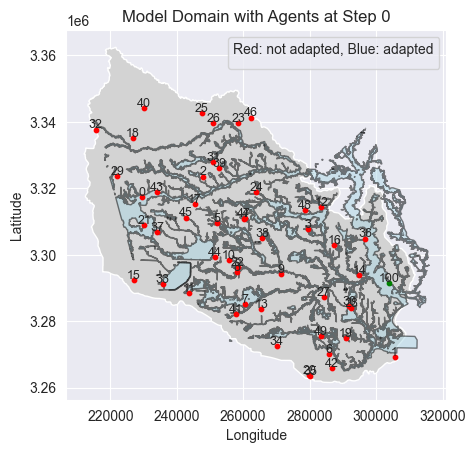

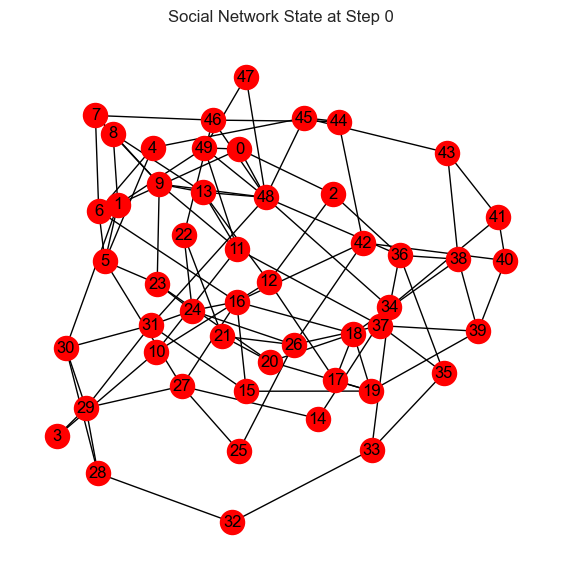

31487.368371830074
Hi, I am agent 2.
probability: 0.6780158063863801
flood damage: 90684.71597089218
cost of measures: 59400
effectiveness: 1.5435137368837069
leaning towards measures:2.093053421963323
Desire to take measure: True
Adapted: True
Hi, I am agent 21.
probability: 0.4813164451011283
flood damage: 83308.02488557264
cost of measures: 42600
effectiveness: 1.9790616170322215
leaning towards measures:1.9051098042920789
Desire to take measure: True
Adapted: True
Hi, I am agent 5.
probability: 0.6347713244261217
flood damage: 104311.32036934796
cost of measures: 41100
effectiveness: 2.5623192303977604
leaning towards measures:3.252973542964215
Desire to take measure: True
Adapted: True
Hi, I am agent 41.
probability: 0.701454907224254
flood damage: 72659.75786299948
cost of measures: 42600
effectiveness: 1.729102297253509
leaning towards measures:2.425774583002409
Desire to take measure: True
Adapted: True
Hi, I am agent 39.
probability: 0.7354641996287838
flood damage: 162731.000

<Figure size 1000x600 with 0 Axes>

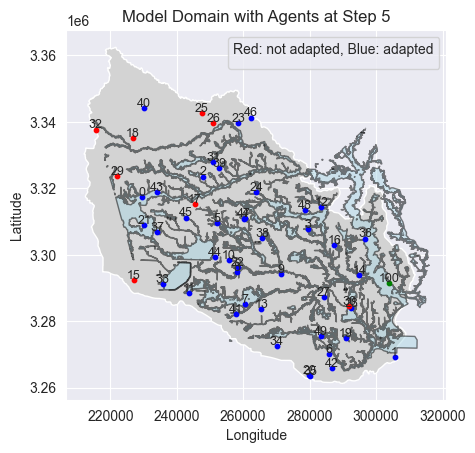

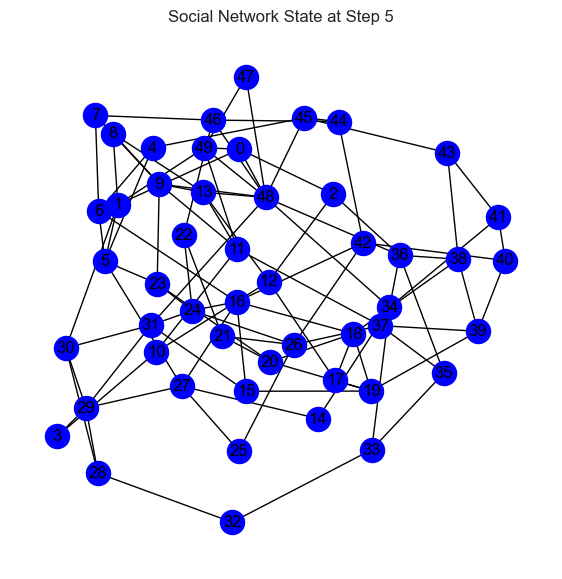

187791.33430566735
Hi, I am agent 33.
probability: 0.4303873280885883
flood damage: 150637.91782051182
cost of measures: 48900
effectiveness: 3.100979914529894
leaning towards measures:2.6692449197418004
Desire to take measure: True
Adapted: True
Hi, I am agent 17.
probability: 0.1828339607703878
flood damage: 153033.22370059314
cost of measures: 58800
effectiveness: 2.619612647969271
leaning towards measures:0.9579083122248508
Desire to take measure: False
Adapted: False
Hi, I am agent 21.
probability: 0.47712875560010953
flood damage: 83308.02488557264
cost of measures: 42600
effectiveness: 1.9790616170322215
leaning towards measures:1.8885344131810489
Desire to take measure: True
Adapted: True
Hi, I am agent 10.
probability: 0.4358310360373173
flood damage: 144654.65263134675
cost of measures: 55500
effectiveness: 2.6244081555197614
leaning towards measures:2.287597050809925
Desire to take measure: True
Adapted: True
Hi, I am agent 3.
probability: 0.1830792040439361
flood damage: 0.

<Figure size 1000x600 with 0 Axes>

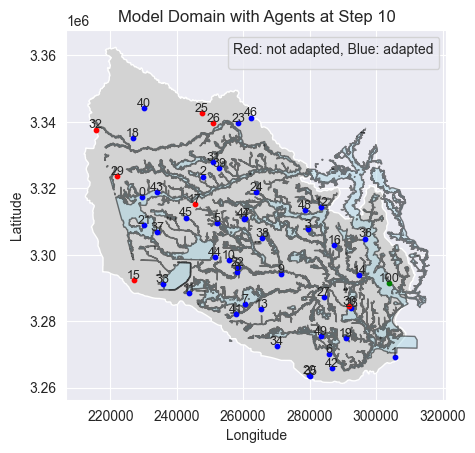

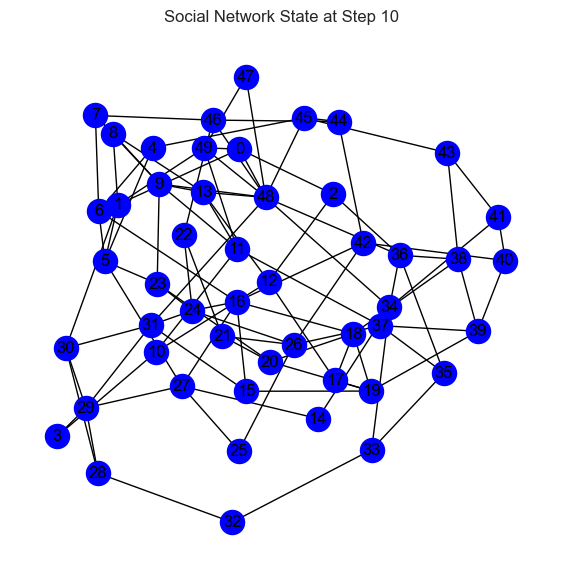

343707.0976160622
Hi, I am agent 2.
probability: 0.5260332325309515
flood damage: 90684.71597089218
cost of measures: 59400
effectiveness: 1.5435137368837069
leaning towards measures:1.6238790409377297
Desire to take measure: True
Adapted: True
Hi, I am agent 41.
probability: 0.5107390324315353
flood damage: 72659.75786299948
cost of measures: 42600
effectiveness: 1.729102297253509
leaning towards measures:1.7662400685488042
Desire to take measure: True
Adapted: True
Hi, I am agent 35.
probability: 0.44816304740221286
flood damage: 126848.27655801359
cost of measures: 57600
effectiveness: 2.219588134687736
leaning towards measures:1.989474764838898
Desire to take measure: True
Adapted: True
Hi, I am agent 7.
probability: 0.4731282187002043
flood damage: 115152.21713891836
cost of measures: 36900
effectiveness: 3.147756562030308
leaning towards measures:2.9785849101905573
Desire to take measure: True
Adapted: True
Hi, I am agent 49.
probability: 0.4731025508570772
flood damage: 81516.16

<Figure size 1000x600 with 0 Axes>

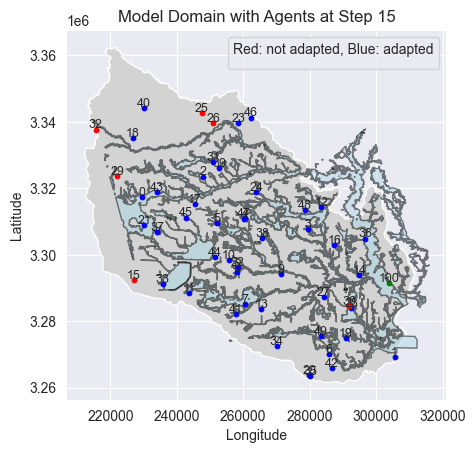

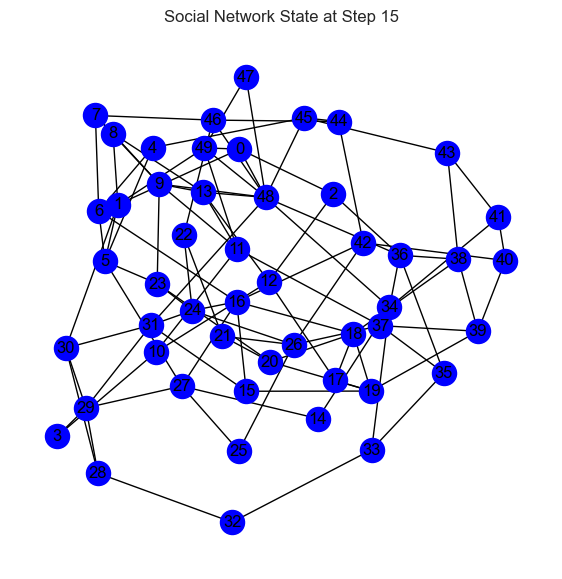

499498.34696623887
Hi, I am agent 8.
probability: 0.49756825818362627
flood damage: 141764.71757783907
cost of measures: 36600
effectiveness: 3.900675343656805
leaning towards measures:3.8817044729662684
Desire to take measure: True
Adapted: True
Hi, I am agent 30.
probability: 0.3353992036516182
flood damage: 0.0
cost of measures: 46500
effectiveness: 0.021505376344086023
leaning towards measures:0.0144257722000696
Desire to take measure: False
Adapted: False
Hi, I am agent 0.
probability: 0.44522524724198037
flood damage: 163543.22895902017
cost of measures: 51900
effectiveness: 3.170389767996535
leaning towards measures:2.823075136619404
Desire to take measure: True
Adapted: True
Hi, I am agent 48.
probability: 0.4131861123422313
flood damage: 72365.74088332008
cost of measures: 36000
effectiveness: 2.037937246758891
leaning towards measures:1.6840947363714733
Desire to take measure: True
Adapted: True
Hi, I am agent 27.
probability: 0.3316405162690066
flood damage: 79483.4331610814

<Figure size 1000x600 with 0 Axes>

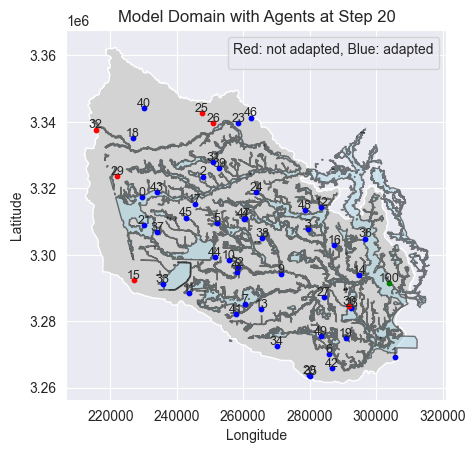

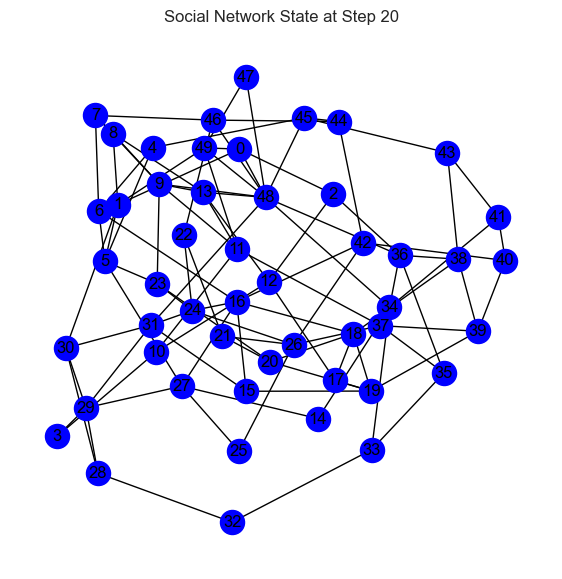

In [2]:
from model import AdaptationModel
from agents import Government, Households
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    for agent in model.schedule.agents:
        if isinstance(agent, Households):
            colors = 'blue' if agent.desire_to_take_measures else 'red' 
        #elif isinstance(agent, Government):
            #colors = 'green'
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data


FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   2.089890              0.777000          1.705737   
     1                   3.755497              0.879334          4.496125   
     2                   0.210766              0.376446          0.161377   
     3                   0.000000              0.000000          0.000000   
     4                   1.676636              0.738531          0.859964   
...                           ...                   ...               ...   
19   46                  1.962574              0.766025          2.165820   
     47                  0.000000              0.000000          0.000000   
     48                  0.417191              0.495663          0.227770   
     49                  0.581772              0.553723          0.611005   
     100                      NaN                   NaN               NaN   

              FloodDamageActual DesireToTakeMeasures IsAdapted  FriendsCount  \
Step AgentID                                                                   
0    0                 0.741536                False     False           4.0   
     1                 0.910762                False     False           5.0   
     2                 0.329827                False     False           3.0   
     3                 0.000000                False     False           2.0   
     4                 0.621959                False     False           3.0   
...                         ...                  ...       ...           ...   
19   46                0.783231                 True      True           4.0   
     47                0.000000                False      True           2.0   
     48                0.389994                 True      True          10.0   
     49                0.562283                 True      True           5.0   
     100                    NaN                 None      None           NaN   

                                                   location  MoneySaved  \
Step AgentID                                                              
0    0         POINT (229665.60084404857 3317263.588553591)    38095.20   
     1         POINT (305556.0831591487 3269145.3488437575)    36493.20   
     2        POINT (247775.98852455697 3323557.6238076524)    36748.80   
     3          POINT (279457.4724758256 3307761.850700149)    30915.00   
     4         POINT (260586.3333880857 3310996.2960415133)    29552.40   
...                                                     ...         ...   
19   46         POINT (262426.9232753313 3341325.947675036)    40900.75   
     47        POINT (260322.1234680079 3310917.3951213397)    56589.50   
     48       POINT (278502.35154231003 3313423.3334517875)    23070.00   
     49        POINT (283444.1682405799 3275449.6342815454)    41874.25   
     100      POINT (303875.36130707216 3291441.3997345758)         NaN   

              FinedTotal  
Step AgentID              
0    0               NaN  
     1               NaN  
     2               NaN  
     3               NaN  
     4               NaN  
...                  ...  
19   46              NaN  
     47              NaN  
     48              NaN  
     49              NaN  
     100         84000.0  

[1020 rows x 10 columns]

In [4]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households,total_flood_damage
0,0,0
1,30,0
2,41,0
3,42,0
4,42,0
5,42,0
6,42,0
7,42,0
8,42,0
9,43,0


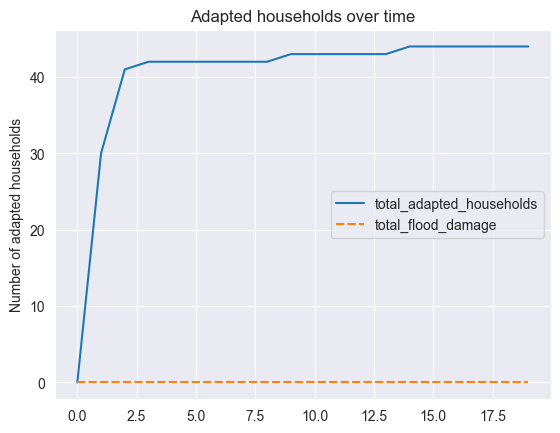

In [7]:
model_data = model.datacollector.get_model_vars_dataframe()
g = sns.lineplot(data=model_data)
g.set(title="Adapted households over time", ylabel="Number of adapted households");